<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 10: Mathematical Morphology​

## Preliminaries

Run the cell below to download the class pack.

In [1]:
import gdown

gdown.download(id='1SL3qL0OcmAM4bLmH6_HnVt1JjylmyXHI')

!unzip -o '10.zip'
!rm '10.zip'

Downloading...
From: https://drive.google.com/uc?id=1SL3qL0OcmAM4bLmH6_HnVt1JjylmyXHI
To: /content/10.zip
100%|██████████| 186k/186k [00:00<00:00, 48.8MB/s]

Archive:  10.zip
  inflating: captchaA.png            
  inflating: captchaB.png            
  inflating: captchaC.png            
  inflating: captchaD.png            
  inflating: logo.png                
  inflating: logo-pepper.png         
  inflating: logo-salt.png           
  inflating: logo-salt-pepper.png    
  inflating: map.png                 
  inflating: sdx.py                  


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [2]:
import cv2 as cv
import numpy as np

from sdx import *

## Binary operators

### Loading image

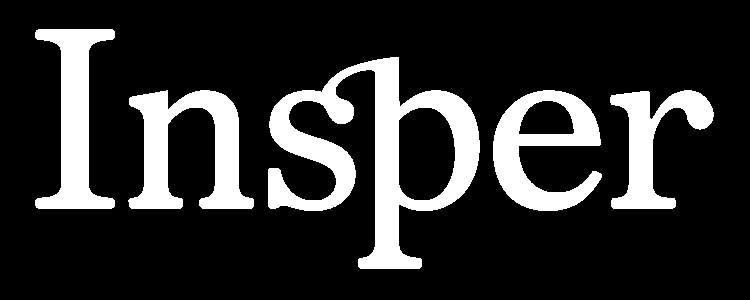

In [31]:
image = cv_grayread('logo.png')

cv_imshow(image)

### Defining the structuring element

In [32]:
# cv.MORPH_RECT
# cv.MORPH_ELLIPSE
# cv.MORPH_CROSS

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))

kernel

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

### Activity 1: binary erosion

As efficiently as possible, but without using OpenCV functions, write a code such that, for each `(y, x)`, the value of `output_image[y, x]` is:

* `255` if, for the neighborhood centered at `image[y, x]`, all pixels mapped to `1` in the kernel are `255`;

* `0` otherwise.

For simplicity, you can ignore the borders.

In [33]:
def erosion(image, kernel):
  height, width = image.shape

  output_image = np.zeros((height, width))
  height_k= kernel.shape[0]//2
  width_k = kernel.shape[1]//2
  for i in range(height_k, height-height_k):
    for j in range(width_k, width-width_k):
        temp= image[i-height_k:i+height_k+1, j-width_k:j+width_k+1]
        resultado = np.logical_and(temp,kernel)
        if np.array_equal(resultado,kernel):
            output_image[i,j] = 255


  return output_image

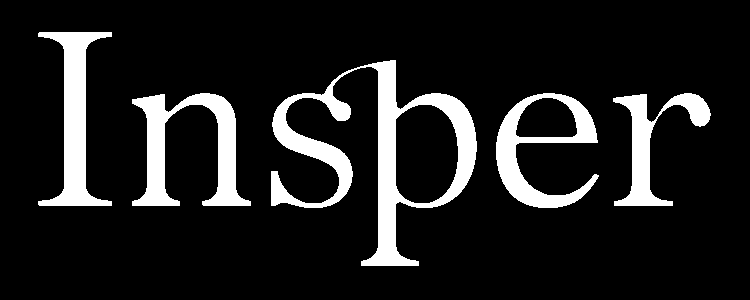

In [34]:
cv_imshow(erosion(image, kernel))

### Activity 2: binary dilation

As efficiently as possible, but without using OpenCV functions, write a code such that, for each `(y, x)`, if the value of `image[y, x]` is `255`, then all pixels in its neighborhood that are mapped to `1` in the kernel are elevated to `255`.

For simplicity, you can ignore the borders.

In [45]:
def dilation(image, kernel):
  height, width = image.shape

  output_image = np.zeros((height, width))
  height_k= kernel.shape[0]//2
  width_k = kernel.shape[1]//2

  for i in range(height_k, height-height_k):
    for j in range(width_k, width-width_k):

        temp = output_image[i-height_k:i+height_k+1, j-width_k:j+width_k+1]

        if image[i,j] == 255:
            temp[:] = np.maximum(np.multiply(255,kernel), temp)

  return output_image

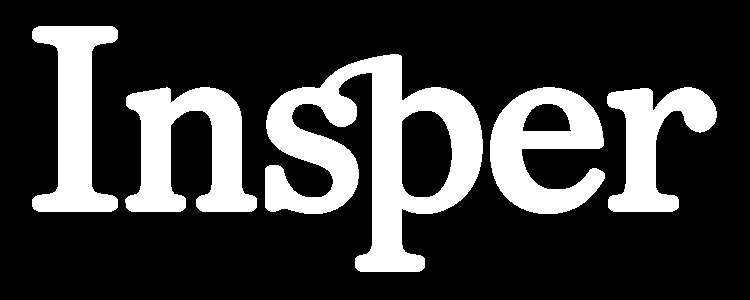

In [46]:
cv_imshow(dilation(image, kernel))

### Activity 3: morphological gradient

Using the two previous functions (or `cv.erode` and `cv.dilate` if your versions are not working correctly), write a code that detects borders.

In [10]:
def gradient(image, kernel):
  return image.copy() - cv.erode(image,kernel)

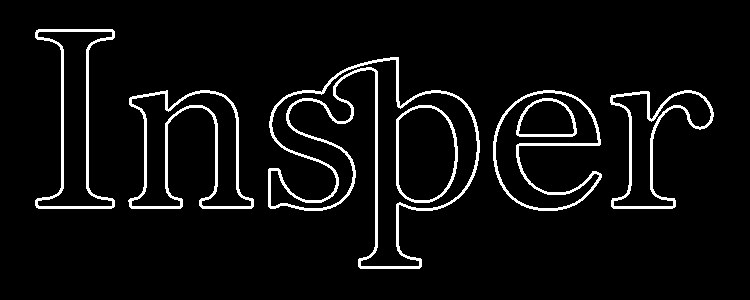

In [11]:
cv_imshow(gradient(image, kernel))

## Noise challenges

For each image below, use erosions and/or dilations to eliminate as much noise as possible while preserving the original shapes. *(that is, the resulting characters cannot be thinner or thicker than the original ones)*

### Salt

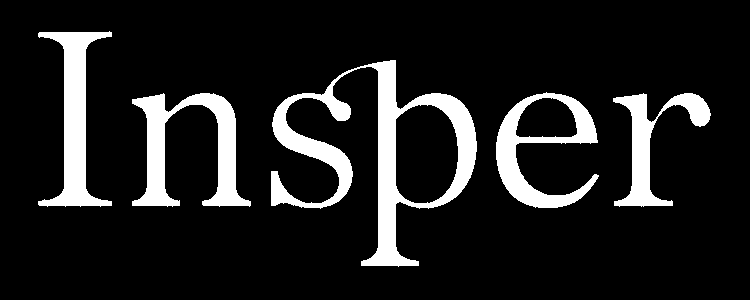

In [12]:
image = cv_grayread('logo-salt.png')

image = cv.erode(image,kernel)

cv_imshow(image)

### Pepper

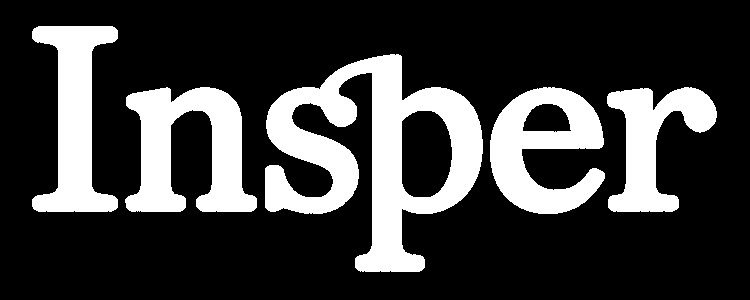

In [13]:
image = cv_grayread('logo-pepper.png')

image = cv.dilate(image, kernel)

cv_imshow(image)

### Salt and pepper

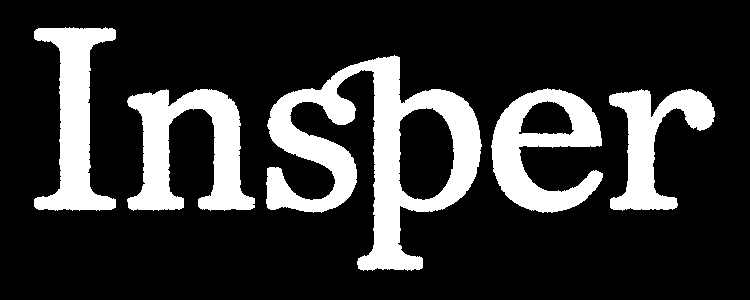

In [14]:
image = cv_grayread('logo-salt-pepper.png')

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

image = cv.erode(image, kernel)
image = cv.dilate(image, kernel_1)

cv_imshow(image)

## Level operators

### Loading image

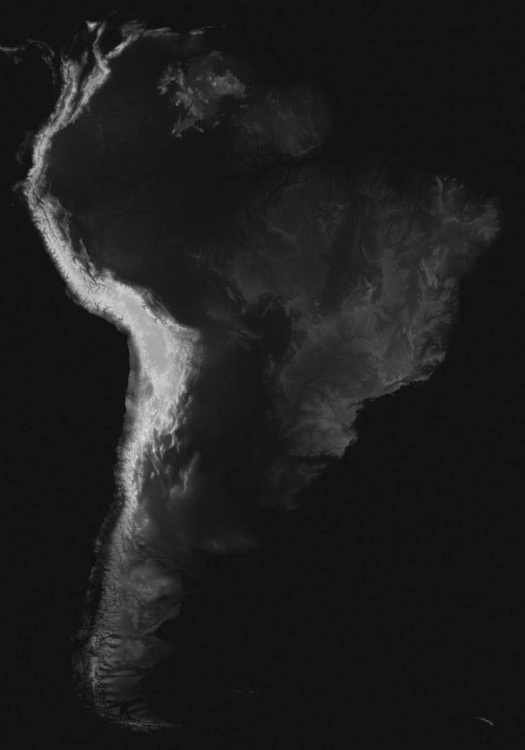

In [15]:
image = cv_grayread('map.png')

cv_imshow(image)

### Defining the structuring element

In [16]:
# cv.MORPH_RECT
# cv.MORPH_ELLIPSE
# cv.MORPH_CROSS

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

### Level erosion

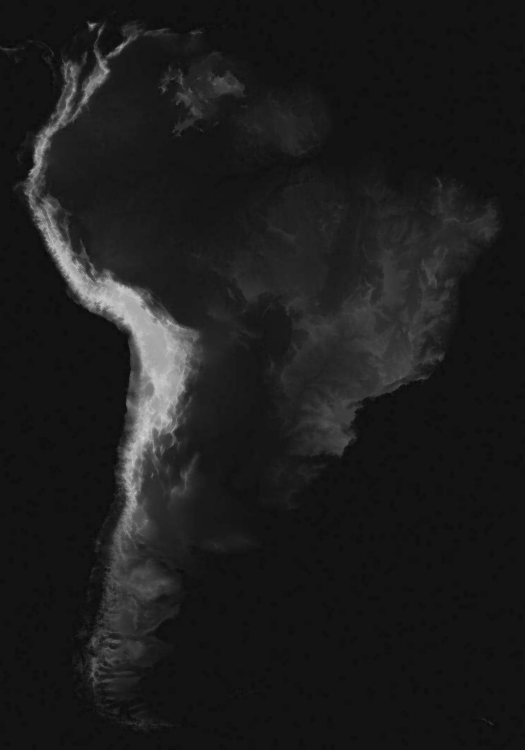

In [17]:
cv_imshow(cv.erode(image, kernel))

### Level dilation

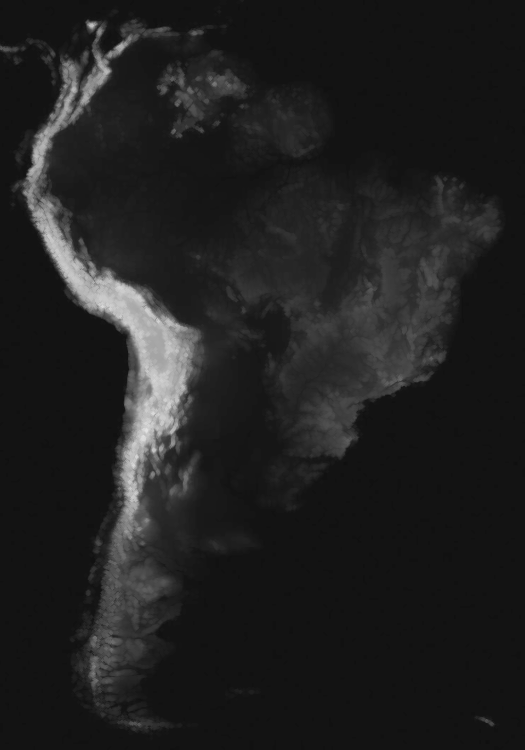

In [18]:
cv_imshow(cv.dilate(image, kernel))

## Captcha challenges

For each image below, use **any combination of the classic vision algorithms given in previous classes** to eliminate as much noise as possible while preserving the original shapes. *(that is, the resulting characters cannot be significantly thinner or thicker than the original ones)*

In [19]:
def median_blur(image, n):
  rois = np.lib.stride_tricks.sliding_window_view(image, (n, n))
  return np.median(rois, axis=(2, 3))

In [20]:
def detect(image):
  return cv.Canny(image, 100, 200)

In [21]:
import scipy

### Captcha A

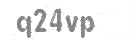

In [22]:
image = cv_grayread('captchaA.png')

kernel_a_dilate = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_a_erode = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

image = cv.dilate(image,kernel_a_dilate)
image = cv.erode(image,kernel_a_erode)

cv_imshow(image)

### Captcha B

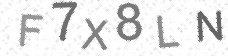

In [23]:
image = cv_grayread('captchaB.png')

kernel_b_dilate = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_b_erode = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

image = cv.dilate(image,kernel_a_dilate)
image = cv.erode(image,kernel_a_erode)

cv_imshow(image)

### Captcha C

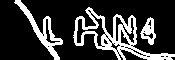

In [24]:
image = cv_grayread('captchaC.png')

kernel_c_erode = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 1))
kernel_c_dilate = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))


# image = cv.erode(image,kernel_c_erode)
# image = cv.erode(image,kernel_c_dilate)
# image = image - detect(image)

# n = 3
# s = 1
# r = n // 2
# l = np.linspace(-r, r, n)
# g = np.meshgrid(l, l)
# x = g[0]
# y = g[1]
# kernel = np.exp(-(x**2 + y**2) / (2 * s**2)) / (2 * np.pi * s**2)

# image = scipy.signal.convolve2d(image, kernel)
image = detect(image)
# image = cv.erode(image, kernel_c_erode)
image = cv.dilate(image,kernel_c_dilate)


cv_imshow(image)

### Captcha D

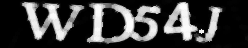

In [25]:
image = cv_grayread('captchaD.png')

kernel_d_dilate = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
kernel_d_erode = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

image = median_blur(image, 3)
image = cv.erode(image,kernel_d_erode)
image = cv.dilate(image,kernel_d_dilate)

cv_imshow(image)

You can click on the toc.png tab to the left to browse by section.